In [1]:
from matplotlib.pyplot import *

rcParams['mathtext.rm'] = "Arial"
rcParams['font.family'] = 'Arial'

data = """
Grouped Factors with Summed Frequencies and Average Accuracy (Sorted by Frequency):
Factor27(67): Frequency = 67, Avg Accuracy = nan
Factor30(56): Frequency = 56, Avg Accuracy = nan
Factor19(50): Frequency = 50, Avg Accuracy = nan
Factor5(47) & Factor24(2): Frequency = 49, Avg Accuracy = nan
Factor1(42) & Factor34(7): Frequency = 49, Avg Accuracy = nan
Factor6(45): Frequency = 45, Avg Accuracy = nan
Factor4(23) & Factor26(16): Frequency = 39, Avg Accuracy = nan
Factor15(31): Frequency = 31, Avg Accuracy = nan
Factor35(4) & Factor12(16) & Factor28(11): Frequency = 31, Avg Accuracy = nan
Factor20(28): Frequency = 28, Avg Accuracy = nan
Factor43(27): Frequency = 27, Avg Accuracy = nan
Factor2(27): Frequency = 27, Avg Accuracy = nan
Factor23(26): Frequency = 26, Avg Accuracy = nan
Factor21(8) & Factor17(18): Frequency = 26, Avg Accuracy = nan
Factor14(24): Frequency = 24, Avg Accuracy = nan
Factor29(17) & Factor33(6): Frequency = 23, Avg Accuracy = nan
Factor42(5) & Factor8(18): Frequency = 23, Avg Accuracy = nan
Factor25(14) & Factor44(7): Frequency = 21, Avg Accuracy = nan
Factor40(21): Frequency = 21, Avg Accuracy = nan
Factor39(21): Frequency = 21, Avg Accuracy = nan
Factor41(19): Frequency = 19, Avg Accuracy = nan
Factor7(19): Frequency = 19, Avg Accuracy = nan
Factor16(19): Frequency = 19, Avg Accuracy = nan
Factor9(18): Frequency = 18, Avg Accuracy = nan
Factor18(15) & Factor38(3): Frequency = 18, Avg Accuracy = nan
Factor31(18): Frequency = 18, Avg Accuracy = nan
Factor45(17): Frequency = 17, Avg Accuracy = nan
Factor32(17): Frequency = 17, Avg Accuracy = nan
Factor22(15): Frequency = 15, Avg Accuracy = nan
Factor37(15): Frequency = 15, Avg Accuracy = nan
Factor36(15): Frequency = 15, Avg Accuracy = nan
Factor10(15): Frequency = 15, Avg Accuracy = nan
Factor13(14): Frequency = 14, Avg Accuracy = nan
Factor11(13): Frequency = 13, Avg Accuracy = nan
Factor3(13): Frequency = 13, Avg Accuracy = nan
"""

In [2]:
import re
import pandas as pd
import matplotlib.pyplot as plt

# Extract lines with factors and their total frequencies
lines = re.findall(r"(.*?): Frequency = (\d+), Avg Accuracy = .*", data)

# Initialize the results list
results_combined = []

for line, total_freq in lines:
    # Extract all individual factors in the line
    factors = re.findall(r"Factor\d+\(\d+\)", line)
    # Merge factor names, ignoring frequencies in parentheses
    merged_name = "+".join([re.match(r"(Factor\d+)", f).group(1).replace("Factor", "") for f in factors])
    # Append merged factors and their total frequency
    results_combined.append({"Factor": merged_name, "Frequency": int(total_freq)})

# Create a DataFrame
df_combined = pd.DataFrame(results_combined)

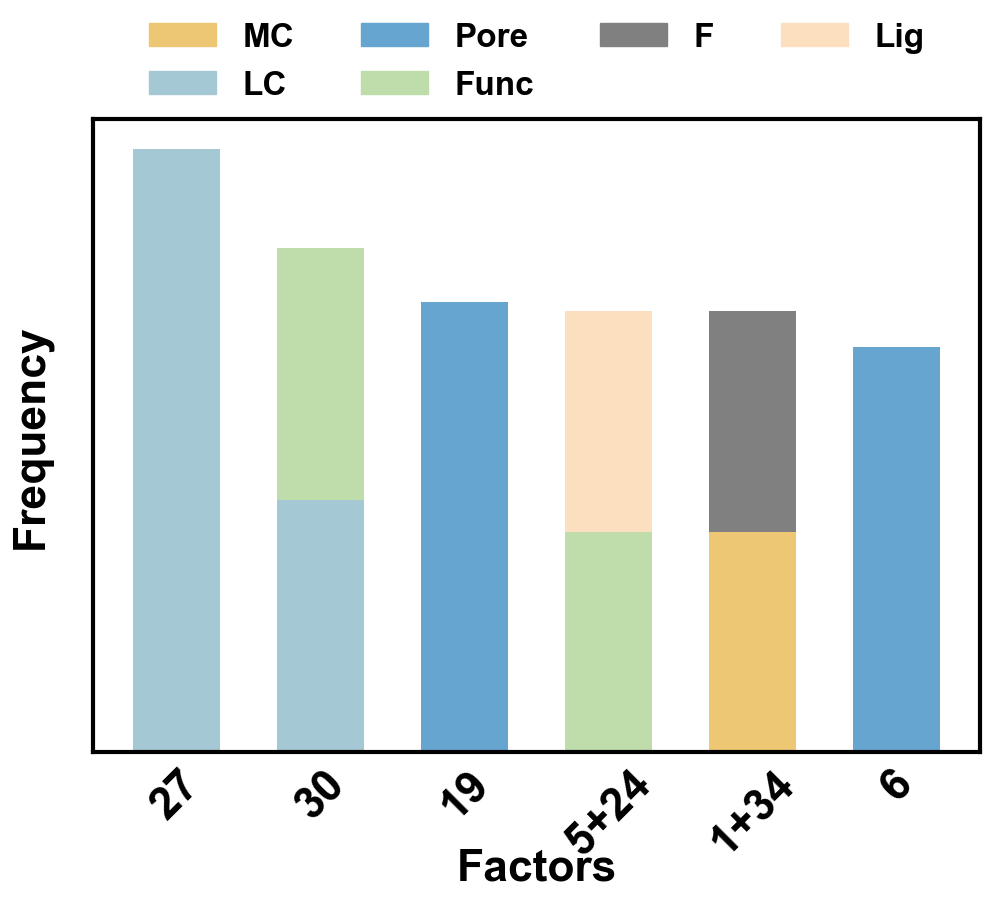

In [3]:
import matplotlib.patches as mpatches

# Define new labels for the bars
factors = ["LC", "LC + Func", "Pore", "Func + Lig", "MC + F", "Pore"]
bar_labels = df_combined['Factor'][0:6]
frequencies = df_combined['Frequency'][0:6]
# Define colors for each type
color_map = {
    "MC": "#EDC773",  # Golden yellow
    "LC": "#A4C8D4",  # Sky blue
    "Pore": '#66A5D0',  # deeper blue
    "Func": "#BEDDAB",  # Bright yellow
    "F": "gray",
    "Lig": "#FCDFBE",
}
# Assign colors for each bar
bar_colors = []
for factor in factors:
    if "+" in factor:
        types = factor.split(" + ")
        bar_colors.append([color_map[types[0]], color_map[types[1]]])
    else:
        bar_colors.append(color_map[factor])
        
# Plotting with new labels
fig, ax = plt.subplots(figsize=(10, 8))
bar_width = 0.6
for i, (factor, freq, colors) in enumerate(zip(factors, frequencies, bar_colors)):
    if isinstance(colors, list):  # Dual type bar
        ax.bar(
            i, freq / 2, bar_width, color=colors[0], align='center'
        )  # Bottom color
        ax.bar(
            i, freq / 2, bar_width, bottom=freq / 2, color=colors[1], align='center'
        )  # Top color
    else:  # Single type bar
        ax.bar(i, freq, bar_width, color=colors, align='center')

# Customizing ticks and labels
# Set the thickness of the frame lines (spines)
for spine in ax.spines.values():
    spine.set_linewidth(3)  # Set thickness to 2
    
ax.set_xticks(range(len(bar_labels)))
ax.set_xticklabels(bar_labels, rotation=45, fontsize=32, fontweight='bold',)
ax.tick_params(left=False, bottom=False)  # Remove ticks
ax.set_yticks([])
ax.set_xlabel("Factors", fontweight='bold', fontsize=32, labelpad=-10)
ax.set_ylabel("Frequency", fontweight='bold', fontsize=32, labelpad= 30)
plt.tight_layout()

# Legend
patches = [mpatches.Patch(color=color, label=label) for label, color in color_map.items()]
ax.legend(handles=patches, frameon=False, loc='upper center', bbox_to_anchor=(0.5, 1.2), ncol=len(patches) - 2, prop={'weight': 'bold', "size": 24})
plt.xlabel('Factors', fontsize=32)

# Show plot
plt.show()

In [4]:
import numpy as np 

In [5]:
bar_labels = ['27', '30', '19', '5', '1', '6']

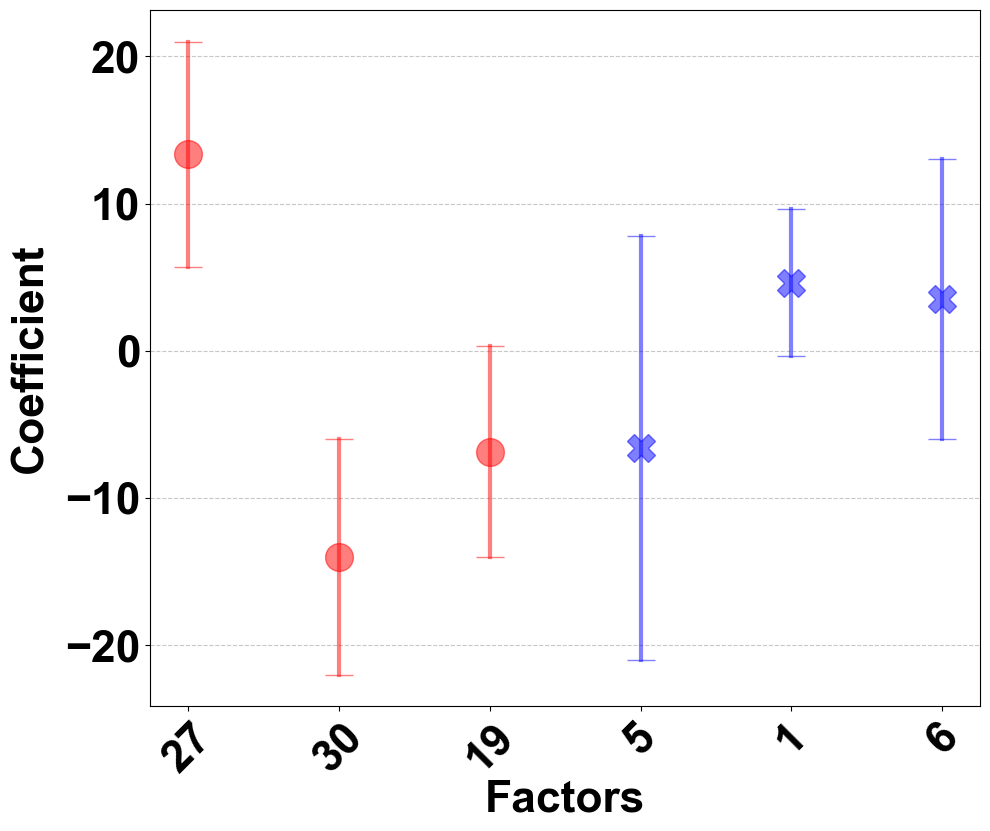

In [6]:
confidence_interval  = np.array([
    [5.7, 21],
    [-22, -6],
    [-14, 0.3],
    [-21, 7.8],
    [-0.33, 9.6],
    [-6, 13],
    ])
# Calculate means
means = confidence_interval.mean(axis=1)


# Plot
plt.figure(figsize=(10, 8))
count = 0 
for i, (low, high) in enumerate(confidence_interval):
    if count in [3, 4, 5]:
        plt.plot(i, means[i], color='blue', marker='X', markersize = 20, label='Mean' if i == 0 else "", alpha = 0.5)
        plt.plot([i, i], [low, high], color='blue',alpha = 0.5, marker='_', markersize=20, label='Confidentce Interval' if i == 0 else "", linewidth=3)
    else:
        plt.plot(i, means[i], color='red', alpha = 0.5,marker='o',markersize = 20,  label='Mean' if i == 0 else "")
        plt.plot([i, i], [low, high], color='red', alpha = 0.5,marker='_', markersize=20, label='Confidentce Interval' if i == 0 else "", linewidth=3)

    count = count + 1
    
    
# Labels and legend
plt.xticks(range(len(confidence_interval)), bar_labels, rotation=45, fontsize=32, fontweight='bold')
plt.ylabel("Coefficient", fontweight='bold', fontsize=32, labelpad= 10)
plt.yticks(fontsize=32, fontweight='bold')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.xlabel('Factors', fontweight='bold', fontsize=32, labelpad=0)

# Show plot
plt.show()

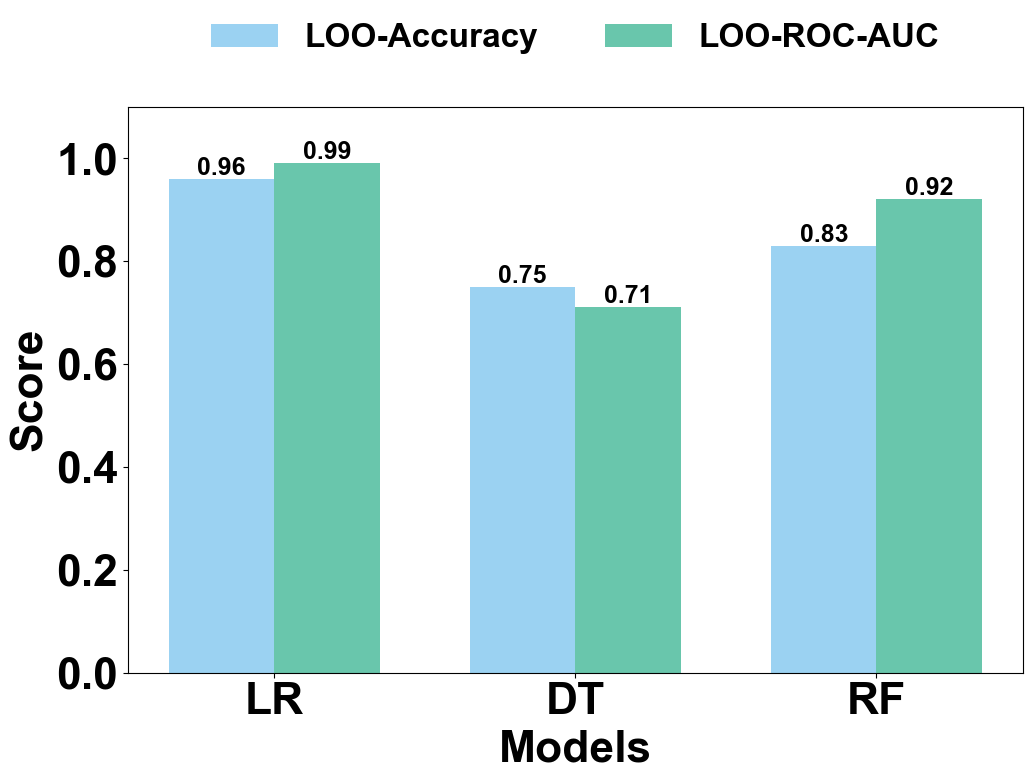

In [7]:
import matplotlib.pyplot as plt
import numpy as np

# Data for models
models = ["LR", "DT", "RF"]
loo_accuracy = [0.96, 0.75, 0.83]
loo_roc_auc = [0.99, 0.71, 0.92]

# Bar width and positions
x = np.arange(len(models))
bar_width = 0.35

# Plot with legend moved to the top
fig, ax = plt.subplots(figsize=(10, 8))
bars1 = ax.bar(x - bar_width/2, loo_accuracy, bar_width, label="LOO-Accuracy", color="#56B4E996")
bars2 = ax.bar(x + bar_width/2, loo_roc_auc, bar_width, label="LOO-ROC-AUC", color="#009E7396")

# Customizing the plot
ax.set_xticks(x)
ax.set_xticklabels(models, fontsize=32, fontweight = "bold")
ax.set_xlabel("Models", fontsize=32, fontweight = "bold")
ax.set_ylabel("Score", fontsize=32, fontweight = "bold")
ax.legend(fontsize=24, frameon=False, loc='upper center', bbox_to_anchor=(0.5, 1.2), ncol=2, prop={'weight': 'bold', "size": 24})

# Add value annotations
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height - 0.01),
                    xytext=(0, 3),  # Offset
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=18, fontweight = "bold")

plt.tight_layout()
plt.ylim(0, 1.1)
plt.yticks(fontsize=32,fontweight = "bold")

plt.show()

In [8]:
data2 = """
Factor5(49) & Factor24(0): Frequency = 49, Avg Accuracy = nan
Factor30(38): Frequency = 38, Avg Accuracy = nan
Factor15(33): Frequency = 33, Avg Accuracy = nan
Factor10(21): Frequency = 21, Avg Accuracy = nan
Factor27(20): Frequency = 20, Avg Accuracy = nan
Factor16(20): Frequency = 20, Avg Accuracy = nan
Factor40(18): Frequency = 18, Avg Accuracy = nan
Factor1(7) & Factor34(11): Frequency = 18, Avg Accuracy = nan
Factor9(17): Frequency = 17, Avg Accuracy = nan
Factor6(16): Frequency = 16, Avg Accuracy = nan
Factor18(15) & Factor38(1): Frequency = 16, Avg Accuracy = nan
Factor22(15): Frequency = 15, Avg Accuracy = nan
Factor43(15): Frequency = 15, Avg Accuracy = nan
Factor21(1) & Factor17(14): Frequency = 15, Avg Accuracy = nan
Factor39(15): Frequency = 15, Avg Accuracy = nan
Factor42(0) & Factor8(14): Frequency = 14, Avg Accuracy = nan
Factor35(2) & Factor12(12) & Factor28(0): Frequency = 14, Avg Accuracy = nan
Factor29(11) & Factor33(2): Frequency = 13, Avg Accuracy = nan
Factor23(13): Frequency = 13, Avg Accuracy = nan
Factor13(13): Frequency = 13, Avg Accuracy = nan
Factor14(13): Frequency = 13, Avg Accuracy = nan
Factor11(13): Frequency = 13, Avg Accuracy = nan
Factor41(12): Frequency = 12, Avg Accuracy = nan
Factor45(12): Frequency = 12, Avg Accuracy = nan
Factor32(12): Frequency = 12, Avg Accuracy = nan
Factor37(12): Frequency = 12, Avg Accuracy = nan
Factor25(2) & Factor44(10): Frequency = 12, Avg Accuracy = nan
Factor7(12): Frequency = 12, Avg Accuracy = nan
Factor36(12): Frequency = 12, Avg Accuracy = nan
Factor19(11): Frequency = 11, Avg Accuracy = nan
Factor31(11): Frequency = 11, Avg Accuracy = nan
Factor20(11): Frequency = 11, Avg Accuracy = nan
Factor4(2) & Factor26(3): Frequency = 5, Avg Accuracy = nan
Factor3(1): Frequency = 1, Avg Accuracy = nan
Factor2(0): Frequency = 0, Avg Accuracy = nan
"""

In [9]:
import re
import pandas as pd
import matplotlib.pyplot as plt

# Extract lines with factors and their total frequencies
lines = re.findall(r"(.*?): Frequency = (\d+), Avg Accuracy = .*", data2)

# Initialize the results list
results_combined = []

for line, total_freq in lines:
    # Extract all individual factors in the line
    factors = re.findall(r"Factor\d+\(\d+\)", line)
    # Merge factor names, ignoring frequencies in parentheses
    merged_name = "+".join([re.match(r"(Factor\d+)", f).group(1).replace("Factor", "") for f in factors])
    # Append merged factors and their total frequency
    results_combined.append({"Factor": merged_name, "Frequency": int(total_freq)})

# Create a DataFrame
df_combined = pd.DataFrame(results_combined)

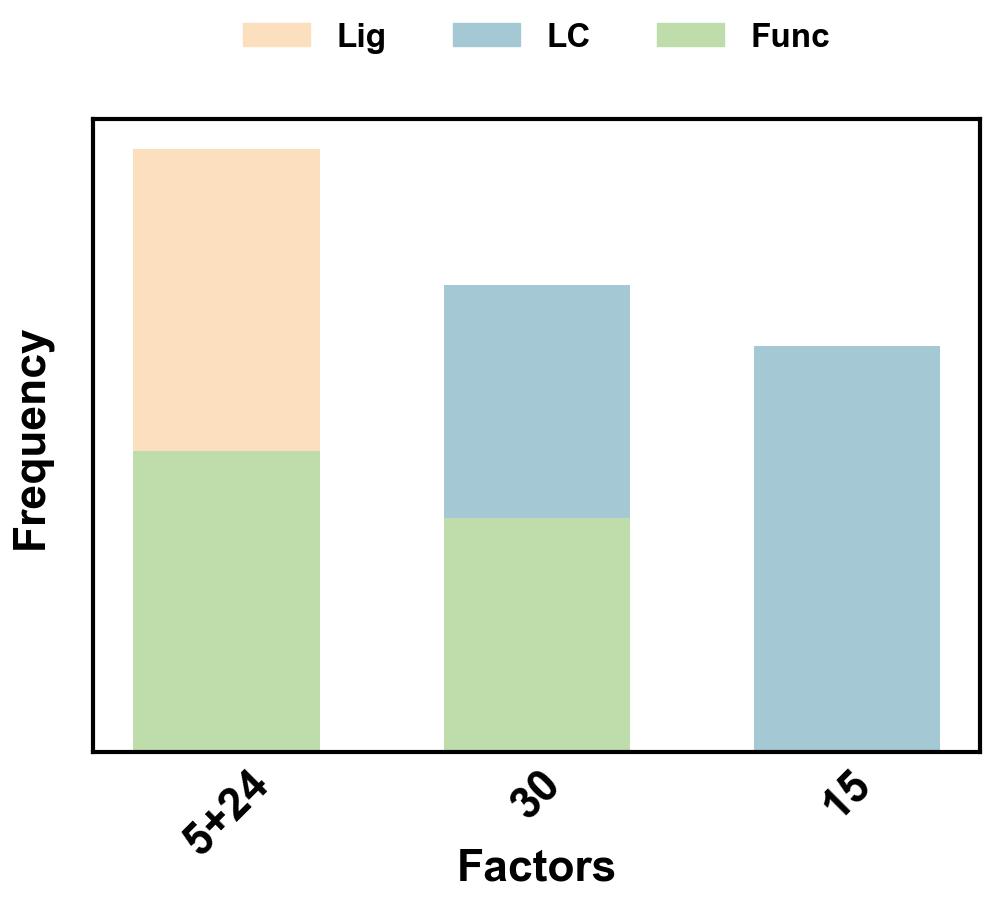

In [10]:
import matplotlib.patches as mpatches

# Define new labels for the bars
factors = ["Func + Lig", "Func + LC", "LC"]
bar_labels = df_combined['Factor'][0:3]
frequencies = df_combined['Frequency'][0:3]
# Define colors for each type

color_map = {
    "Lig": "#FCDFBE",
    "LC": "#A4C8D4",  # Sky blue
    "Func": "#BEDDAB",  # Bright yellow
}

# Assign colors for each bar
bar_colors = []
for factor in factors:
    if "+" in factor:
        types = factor.split(" + ")
        bar_colors.append([color_map[types[0]], color_map[types[1]]])
    else:
        bar_colors.append(color_map[factor])
        
# Plotting with new labels
fig, ax = plt.subplots(figsize=(10, 8))
bar_width = 0.6
for i, (factor, freq, colors) in enumerate(zip(factors, frequencies, bar_colors)):
    if isinstance(colors, list):  # Dual type bar
        ax.bar(
            i, freq / 2, bar_width, color=colors[0], align='center'
        )  # Bottom color
        ax.bar(
            i, freq / 2, bar_width, bottom=freq / 2, color=colors[1], align='center'
        )  # Top color
    else:  # Single type bar
        ax.bar(i, freq, bar_width, color=colors, align='center')

# Customizing ticks and labels
# Set the thickness of the frame lines (spines)
for spine in ax.spines.values():
    spine.set_linewidth(3)  # Set thickness to 2
    
ax.set_xticks(range(len(bar_labels)))
ax.set_xticklabels(bar_labels, rotation=45, fontsize=32, fontweight='bold',)
ax.tick_params(left=False, bottom=False)  # Remove ticks
ax.set_yticks([])
ax.set_xlabel("Factors", fontweight='bold', fontsize=32, labelpad=-10)
ax.set_ylabel("Frequency", fontweight='bold', fontsize=32, labelpad= 30)
plt.tight_layout()

# Legend
patches = [mpatches.Patch(color=color, label=label) for label, color in color_map.items()]
ax.legend(handles=patches, frameon=False, loc='upper center', bbox_to_anchor=(0.5, 1.2), ncol=len(patches), prop={'weight': 'bold', "size": 24})
plt.xlabel('Factors', fontsize=32)

# Show plot
plt.show()

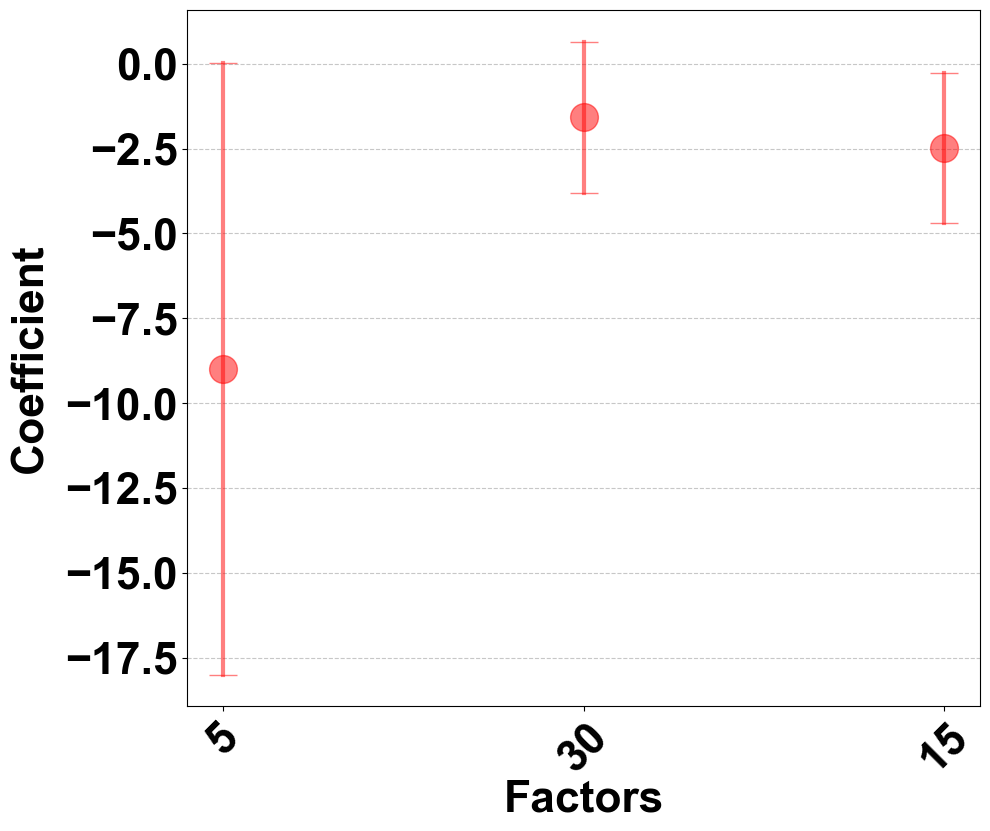

In [11]:
confidence_interval  = np.array([
    [-18, 0.029],
    [-3.8, 0.65],
    [-4.7, -0.28],
    ])
# Calculate means
means = confidence_interval.mean(axis=1)
bar_labels = ['5', '30', '15']
# Plot
plt.figure(figsize=(10, 8))
count = 0 
for i, (low, high) in enumerate(confidence_interval):

    plt.plot(i, means[i], color='red', alpha = 0.5,marker='o',markersize = 20,  label='Mean' if i == 0 else "")
    plt.plot([i, i], [low, high], color='red', alpha = 0.5,marker='_', markersize=20, label='Confidentce Interval' if i == 0 else "", linewidth=3)

    count = count + 1
    
    
# Labels and legend
plt.xticks(range(len(confidence_interval)), bar_labels, rotation=45, fontsize=32, fontweight='bold')
plt.ylabel("Coefficient", fontweight='bold', fontsize=32, labelpad= 10)
plt.yticks(fontsize=32, fontweight='bold')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.xlabel('Factors', fontweight='bold', fontsize=32, labelpad = 0 )

# Show plot
plt.show()

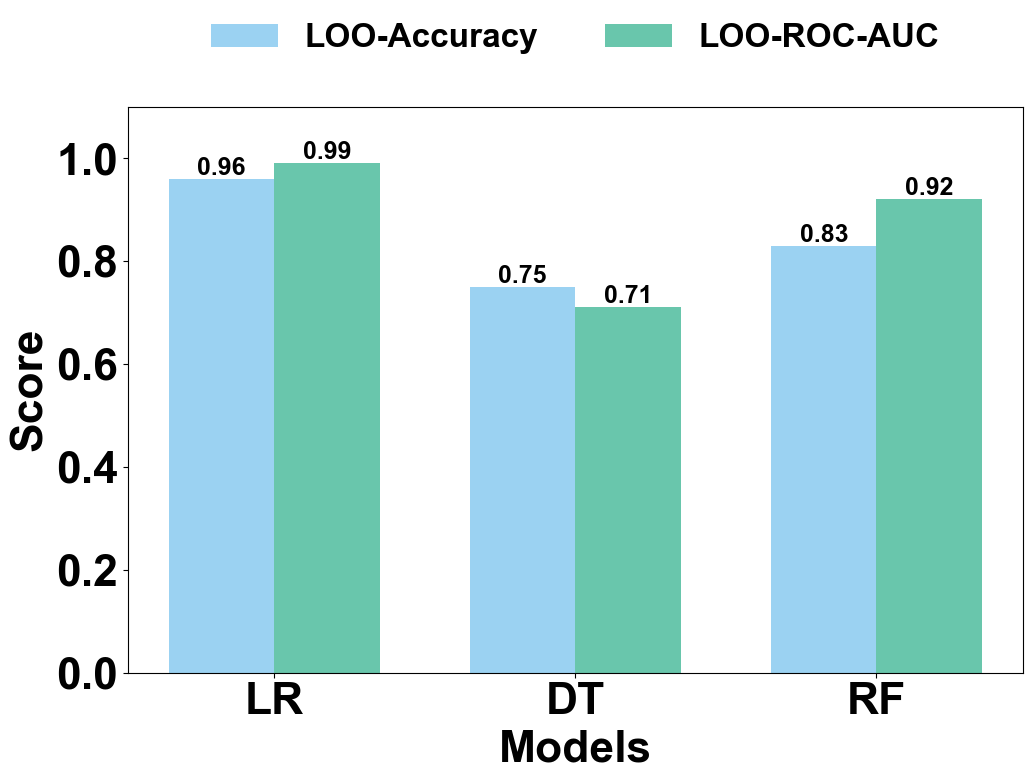

In [12]:
# Bar width and positions
x = np.arange(len(models))
bar_width = 0.35

# Plot with legend moved to the top
fig, ax = plt.subplots(figsize=(10, 8))
bars1 = ax.bar(x - bar_width/2, loo_accuracy, bar_width, label="LOO-Accuracy", color="#56B4E996")
bars2 = ax.bar(x + bar_width/2, loo_roc_auc, bar_width, label="LOO-ROC-AUC", color="#009E7396")

# Customizing the plot
ax.set_xticks(x)
ax.set_xticklabels(models, fontsize=32, fontweight = "bold")
ax.set_xlabel("Models", fontsize=32, fontweight = "bold")
ax.set_ylabel("Score", fontsize=32, fontweight = "bold")
ax.legend(fontsize=24, frameon=False, loc='upper center', bbox_to_anchor=(0.5, 1.2), ncol=2, prop={'weight': 'bold', "size": 24})

# Add value annotations
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height - 0.01),
                    xytext=(0, 3),  # Offset
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=18, fontweight = "bold")

plt.tight_layout()
plt.ylim(0, 1.1)
plt.yticks(fontsize=32,fontweight = "bold")

plt.show()

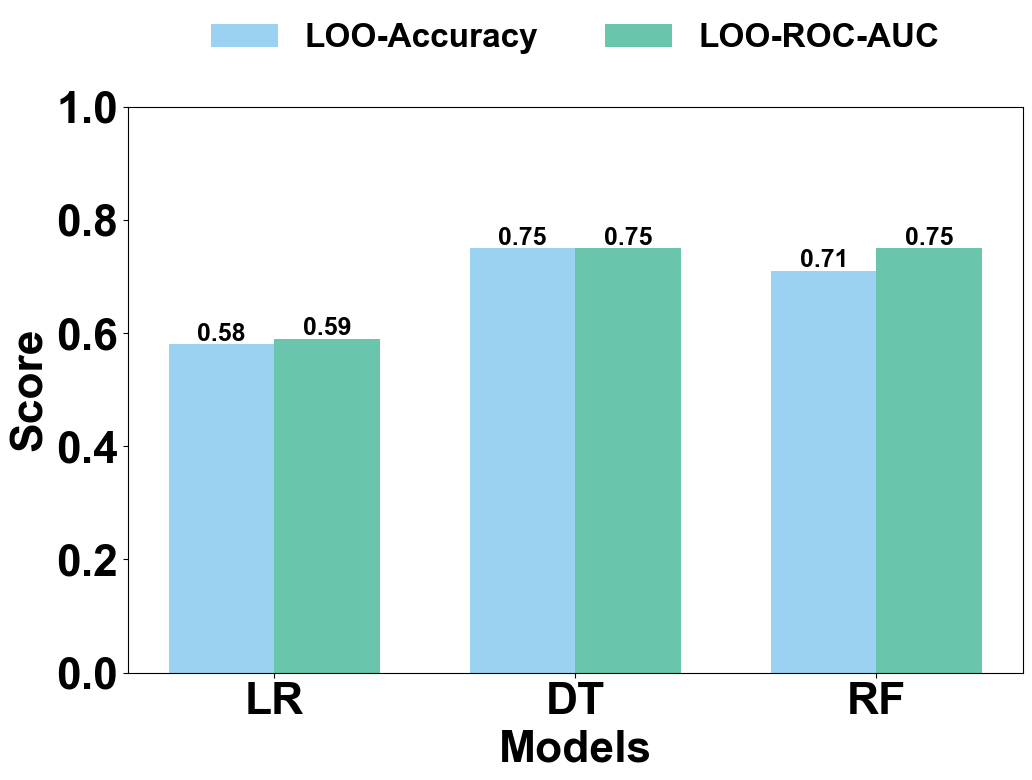

In [13]:
import matplotlib.pyplot as plt
import numpy as np

# Data for models
models = ["LR", "DT", "RF"]
loo_accuracy = [0.58, 0.75, 0.71]
loo_roc_auc = [0.59, 0.75, 0.75]

# Bar width and positions
x = np.arange(len(models))
bar_width = 0.35

# Plot with legend moved to the top
fig, ax = plt.subplots(figsize=(10, 8))
bars1 = ax.bar(x - bar_width/2, loo_accuracy, bar_width, label="LOO-Accuracy", color="#56B4E996")
bars2 = ax.bar(x + bar_width/2, loo_roc_auc, bar_width, label="LOO-ROC-AUC", color="#009E7396")

# Customizing the plot
ax.set_xticks(x)
ax.set_xticklabels(models, fontsize=32, fontweight = "bold")
ax.set_xlabel("Models", fontsize=32, fontweight = "bold")
ax.set_ylabel("Score", fontsize=32, fontweight = "bold")
ax.legend(fontsize=24, frameon=False, loc = "upper center", bbox_to_anchor=(0.5, 1.2), ncol=2, prop={'weight': 'bold', "size": 24})

# Add value annotations
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height - 0.01),
                    xytext=(0, 3),  # Offset
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=18, fontweight = "bold")

plt.tight_layout()
plt.ylim(0, 1)
plt.yticks(fontsize=32,fontweight = "bold")

plt.show()


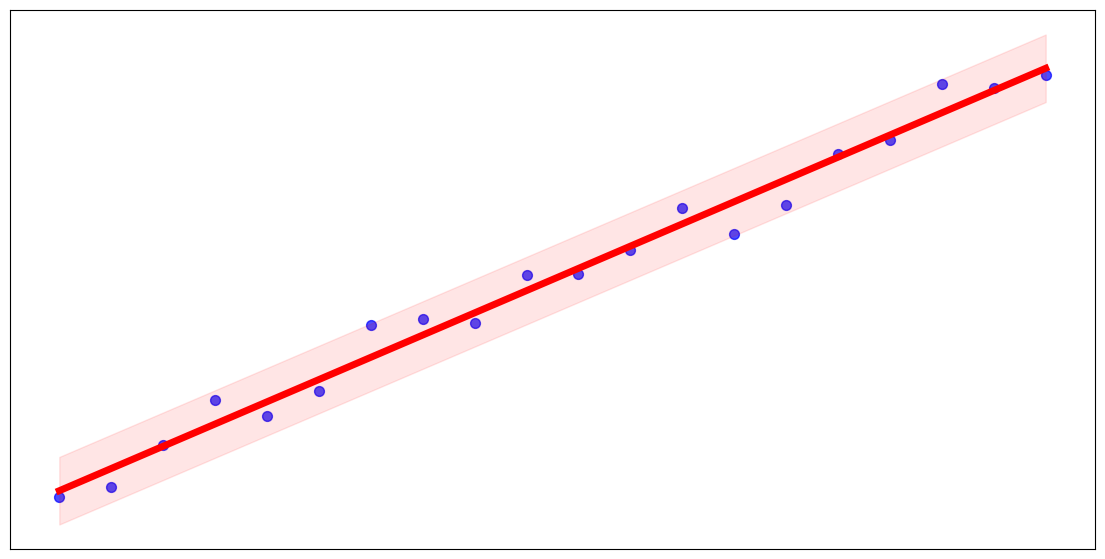

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


# Generate synthetic data
np.random.seed(42)
X = np.linspace(0, 10, 20).reshape(-1, 1)  # Features (independent variable)
y = 2 * X + 3 + np.random.normal(0, 1, size=X.shape)  # Targets (dependent variable)

# Create a linear regression model
model = LinearRegression()

# Fit the model
model.fit(X, y)

# Predict the y values
y_pred = model.predict(X).flatten()
residuals = y - y_pred
mse = mean_squared_error(y, y_pred)

se = np.sqrt(mse)
interval = 1.96 * se

# Plot the data and the regression line
plt.figure(figsize=(14, 7))
plt.scatter(X, y, color="blue", s = 50, label='Data',alpha = 0.7)  # Scatter plot of the data
plt.plot(X, y_pred, color='red', label='Regression Line', lw = 5)  # Regression line
plt.fill_between(X.flatten(), y_pred - interval, y_pred + interval, color='red', alpha=0.1, label='Prediction Interval')

plt.xticks([])
plt.yticks([])
plt.show()


<Figure size 600x600 with 0 Axes>

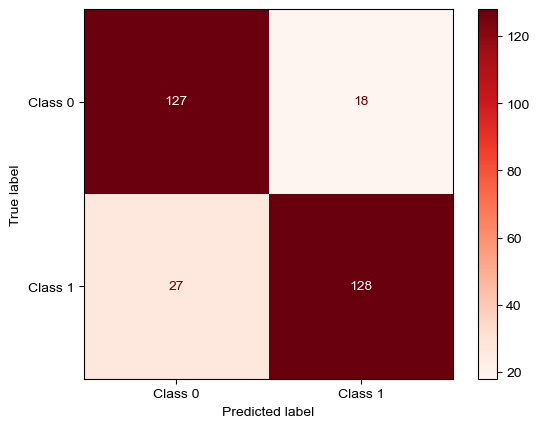

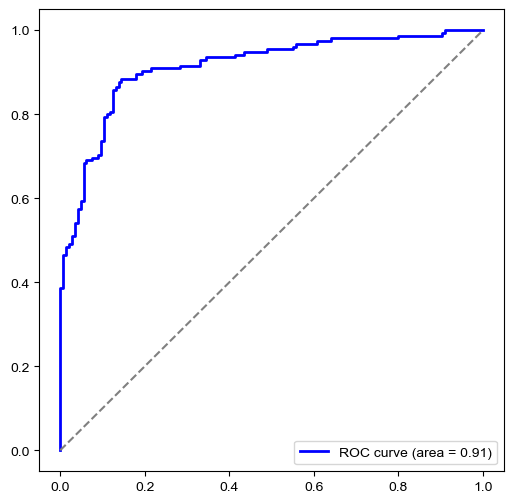

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc

# Generate synthetic binary classification data
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]  # Probabilities for ROC curve

# 1. Plot Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Class 0', 'Class 1'])

# Create a new figure for Confusion Matrix
plt.figure(figsize=(6, 6))
cm_display.plot(cmap=plt.cm.Reds)
plt.show()  # Show confusion matrix plot

# 2. Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Create a new figure for ROC Curve
plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line (random classifier)
plt.legend(loc='lower right')
plt.show()  # Show ROC curve plot


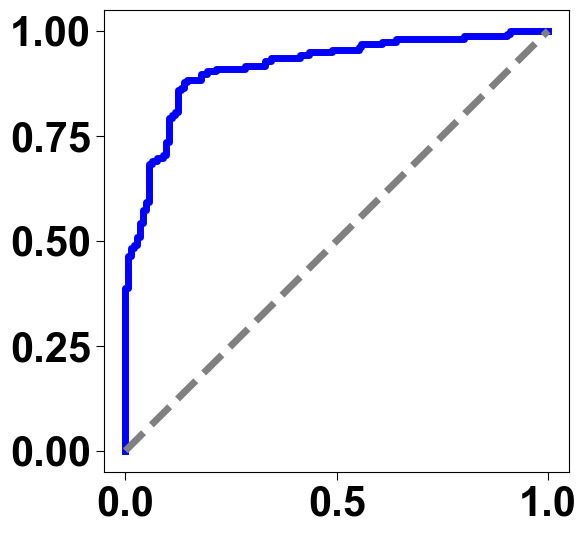

In [16]:

# Create a new figure for ROC Curve
plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, color='blue', lw=5, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=5, linestyle='--')  # Diagonal line (random classifier)
plt.tick_params(axis='both', labelsize=30,length=6)  # Adjust label size, tick width, and length
# Make tick labels bold by changing font properties
plt.gca().tick_params(axis='both', labelsize=30)  # Set tick label size
for label in plt.gca().get_xticklabels() + plt.gca().get_yticklabels():
    label.set_fontweight('bold')  # Set the font weight to bold
plt.show()  # Show ROC curve plot

